In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the datasets
df=pd.read_csv("Zoo.csv")
# Display the first few rows of the DataFrame
print(df.head())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type
0    aardvark     1         0     0     1         0        0         1        1         1         1         0     0     4     0         0        1     1
1    antelope     1         0     0     1         0        0         0        1         1         1         0     0     4     1         0        1     1
2        bass     0         0     1     0         0        1         1        1         1         0         0     1     0     1         0        0     4
3        bear     1         0     0     1         0        0         1        1         1         1         0     0     4     0         0        1     1
4        boar     1         0     0     1         0        0         1        1         1         1         0     0     4     1         0        1     1


In [4]:
# Get the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
# Count the occurrences of each unique value in the 'animal name' column
animal_counts = df['animal name'].value_counts()

# Display the result
print(animal_counts)


animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
scorpion    1
rhea        1
reindeer    1
raccoon     1
pussycat    1
puma        1
porpoise    1
polecat     1
newt        1
platypus    1
pitviper    1
piranha     1
pike        1
pheasant    1
penguin     1
parakeet    1
ostrich     1
oryx        1
opossum     1
seasnake    1
aardvark    1
seawasp     1
skimmer     1
worm        1
wolf        1
wasp        1
wallaby     1
vulture     1
vole        1
vampire     1
tuna        1
tuatara     1
tortoise    1
toad        1
termite     1
swan        1
stingray    1
starfish    1
squirrel    1
sparrow     1
sole        1
slug        1
slowworm    1
skua        1
octopus     1
moth        1
antelope    1
flea        1
elephant    1
duck        1
dove        1
dolphin     1
dogfish     1
deer        1
crow        1
crayfish    1
crab        1
clam        1
chub        1
chicken     1
cheetah     1
cavy        1
catfish     1
carp        1
calf        1
buffalo 

In [6]:
# Get the summary of descriptive statistics
summary = df.describe()

# Display the summary
print(summary)


             hair    feathers        eggs        milk    airborne     aquatic    predator     toothed    backbone    breathes    venomous        fins        legs        tail    domestic     catsize        type
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436    0.554455    0.603960    0.821782    0.792079    0.079208    0.168317    2.841584    0.742574    0.128713    0.435644    2.831683
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335    0.499505    0.491512    0.384605    0.407844    0.271410    0.376013    2.033385    0.439397    0.336552    0.498314    2.102709
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.00000

In [7]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the result
print(missing_values)


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [8]:
# Check for duplicate rows and count them
duplicate_count = df.duplicated().sum()

# Display the result
print(f'Number of duplicate rows: {duplicate_count}')


Number of duplicate rows: 0


## EDA

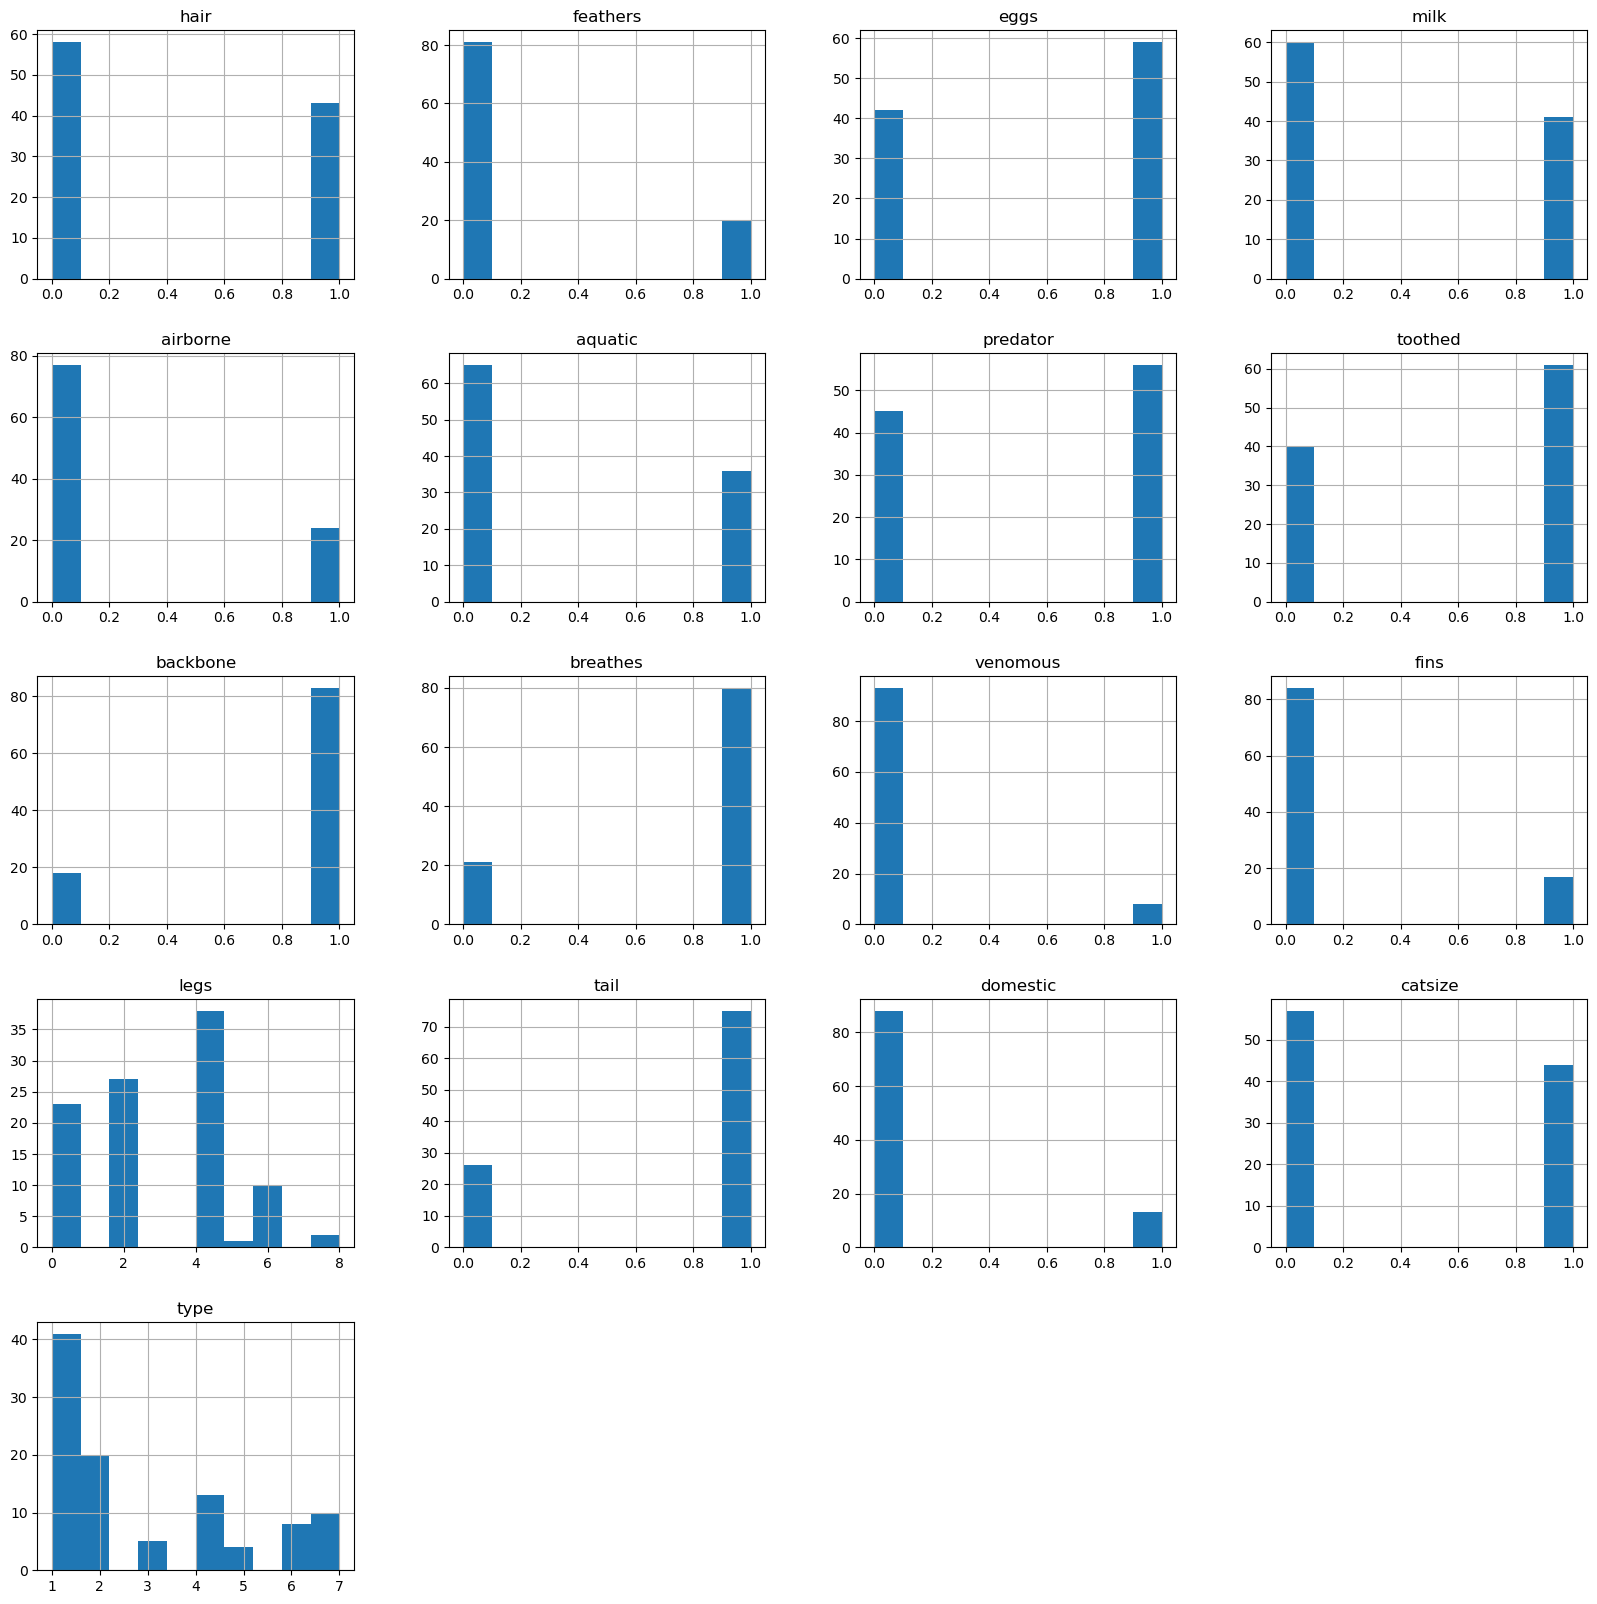

In [9]:
# Create histograms for all columns in the DataFrame 
df.hist(figsize=(20, 20)) 
# Show the plot 
plt.show()

In [10]:
# Dropping the 'animal name' column as it's just a unique identifier
df1 = df.drop('animal name', axis=1)

# Display the first few rows of the modified DataFrame to verify the change
print(df1.head())


   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type
0     1         0     0     1         0        0         1        1         1         1         0     0     4     0         0        1     1
1     1         0     0     1         0        0         0        1         1         1         0     0     4     1         0        1     1
2     0         0     1     0         0        1         1        1         1         0         0     1     0     1         0        0     4
3     1         0     0     1         0        0         1        1         1         1         0     0     4     0         0        1     1
4     1         0     0     1         0        0         1        1         1         1         0     0     4     1         0        1     1


In [11]:
# Display the column names of the modified DataFrame
print(df1.columns)


Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [12]:
# Compute the correlation matrix
correlation_matrix = df1.corr()

# Display the correlation matrix
print(correlation_matrix)


              hair  feathers      eggs      milk  airborne   aquatic  predator   toothed  backbone  breathes  venomous      fins      legs      tail  domestic   catsize      type
hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554 -0.154769  0.492531  0.191681  0.441149 -0.104245 -0.280313  0.394009  0.048973  0.207208  0.455020 -0.562384
feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552 -0.104430 -0.613631  0.231403  0.254588 -0.145739 -0.223541 -0.206686  0.292569  0.031586 -0.135934 -0.197520
eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244  0.011605 -0.642150 -0.340420 -0.382777  0.098689  0.164796 -0.224918 -0.221090 -0.155610 -0.514650  0.661825
milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613 -0.029721  0.628168  0.384958  0.423527 -0.242449 -0.156328  0.214196  0.210026  0.163928  0.574906 -0.723683
airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638 -0.295181 -0.594311 -0.104718  0.286

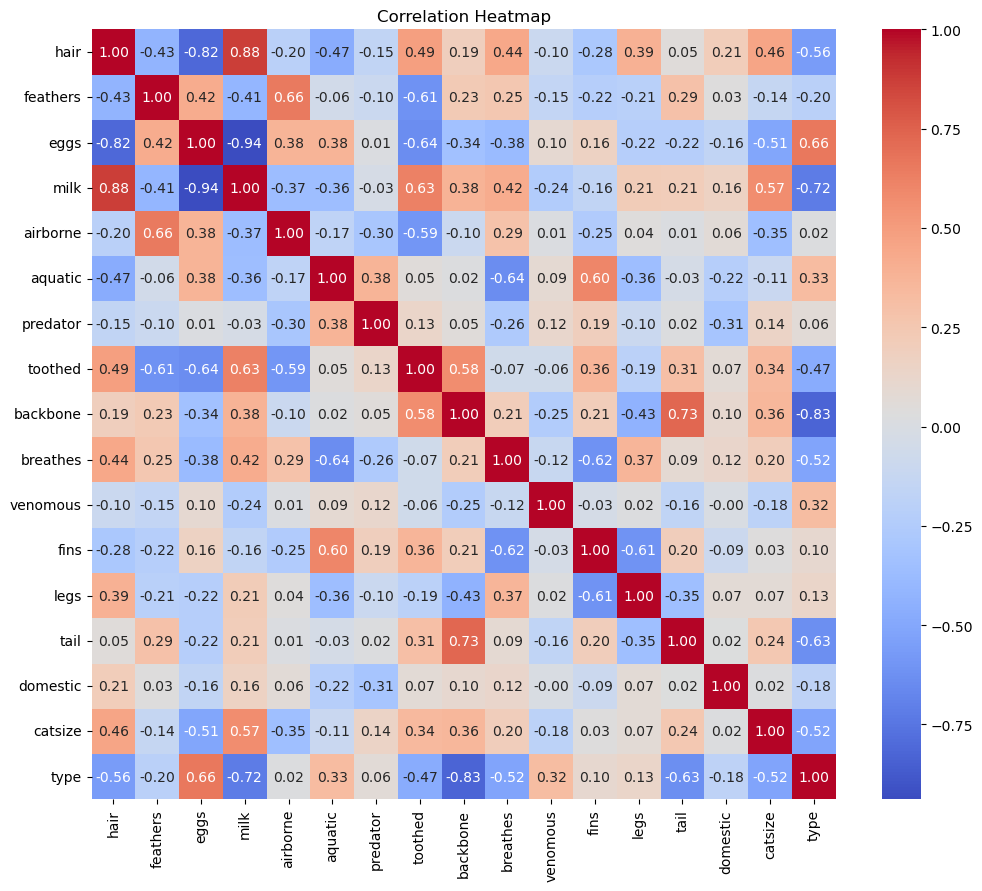

In [13]:
# Set the size of the figure 
plt.figure(figsize=(12, 10)) 
# Create a heatmap of the correlation matrix 
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f') 
# Add a title to the heatmap 
plt.title("Correlation Heatmap") 
# Show the plot 
plt.show()

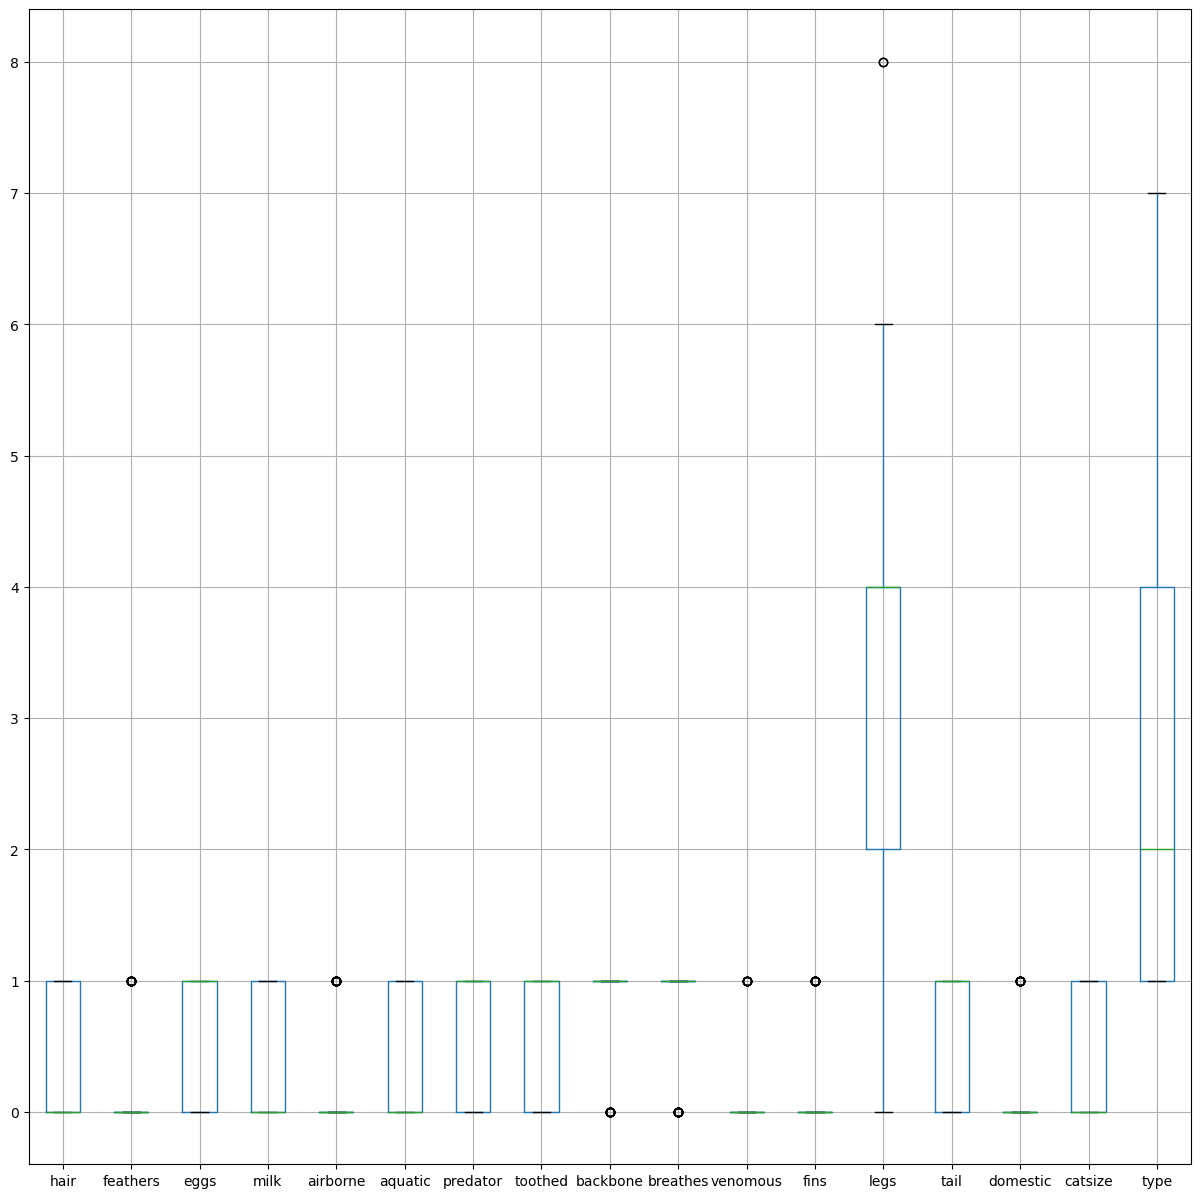

In [14]:
# Create a boxplot for all columns in the DataFrame 
df1.boxplot(figsize=(15, 15)) 
# Show the plot 
plt.show()

## Preprocessing

In [15]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Display the result
print(missing_values)


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [16]:
from scipy import stats 
# Calculate Z-scores for each numeric column in the DataFrame 
z_scores = np.abs(stats.zscore(df1.select_dtypes(include=[np.number]))) 
# Filter the DataFrame to keep only rows where all Z-scores are less than 3 
df1_clean = df1[(z_scores < 3).all(axis=1)] 
# Display the shape of the original and cleaned DataFrames to see the effect of removing outliers 
print(f'Original shape: {df1.shape}') 
print(f'Cleaned shape: {df1_clean.shape}')

Original shape: (101, 17)
Cleaned shape: (93, 17)


## Data Partition

In [17]:
#importing libaries for splitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score

In [18]:
# Splitting data into features and target variable
X = df1.drop(['type'], axis=1)
y = df1['type']


In [19]:
# Checking the shapes of the datasets
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Shape of X: (101, 16)
Shape of y: (101,)


In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Display the shapes of training and testing sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (80, 16)
Shape of X_test: (21, 16)
Shape of y_train: (80,)
Shape of y_test: (21,)


# Model fitting

In [22]:
# Initializing the Model:

#implementing K-Nearest Neighbours algorithm
model = KNeighborsClassifier(n_neighbors=5)

#Fitting the Model:
model.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
# Making Predictions:
y_pred = model.predict(X_test)


In [24]:
# Evaluating the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1 Score: 0.8957902001380263
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21



## Hyper parameter Tunning 

In [25]:
# Import the necessary libraries:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set up k-fold cross-validation:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the model:
model = KNeighborsClassifier(n_neighbors=5)

# Evaluate the model using cross-validation:
results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f'Cross-validation scores: {results}')
print(f'Mean accuracy: {results.mean()}')
print(f'Standard deviation: {results.std()}')


Cross-validation scores: [0.90909091 0.9        0.7        0.9        0.8        1.
 1.         0.8        1.         0.9       ]
Mean accuracy: 0.890909090909091
Standard deviation: 0.09447549859466603


In [26]:
# Model performance is increased

In [27]:
#using GridSearchCV for parameter tuning and optimization
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
KNN = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9625


In [28]:
# Best parameters and cross-validation score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9625


In [29]:
#new model with best parameters
from sklearn.neighbors import KNeighborsClassifier

# Initialize the new KNN model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

# Fit the model to the training data
best_knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [30]:
# Make predictions on the test set
y_pred_new = best_knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy_new = accuracy_score(y_test, y_pred_new)
precision_new = precision_score(y_test, y_pred_new, average='weighted')
recall_new = recall_score(y_test, y_pred_new, average='weighted')
f1_new = f1_score(y_test, y_pred_new, average='weighted')

print(f"Optimized Accuracy: {accuracy_new}")
print(f"Optimized Precision: {precision_new}")
print(f"Optimized Recall: {recall_new}")
print(f"Optimized F1 Score: {f1_new}")

print(classification_report(y_test, y_pred_new))



Optimized Accuracy: 0.9523809523809523
Optimized Precision: 0.9206349206349207
Optimized Recall: 0.9523809523809523
Optimized F1 Score: 0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [31]:
# Hyper parameter tunning to choose an appropriate distance metric and value for k

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Number of folds
num_folds = 10

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize the KNN model
model1 = KNeighborsClassifier(n_neighbors=3)

# Perform cross-validation
results = cross_val_score(model1, X, y, cv=kf)

# Model accuracy
print(f'Mean accuracy: {results.mean()}')


Mean accuracy: 0.95


In [33]:
#Model performance is increased

#using GridSearchCV for parameter tuning and optimization
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
KNN = KNeighborsClassifier()

# Create the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9625


In [34]:
# Classifier's performance on testing set 
from sklearn.neighbors import KNeighborsClassifier

# Initialize the new KNN model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = best_knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"Optimized Accuracy: {accuracy_optimized}")
print(f"Optimized Precision: {precision_optimized}")
print(f"Optimized Recall: {recall_optimized}")
print(f"Optimized F1 Score: {f1_optimized}")

# Detailed classification report
print(classification_report(y_test, y_pred_optimized))




Optimized Accuracy: 0.9523809523809523
Optimized Precision: 0.9206349206349207
Optimized Recall: 0.9523809523809523
Optimized F1 Score: 0.9333333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [35]:
# Visualization of decision boundaries of the classifier 

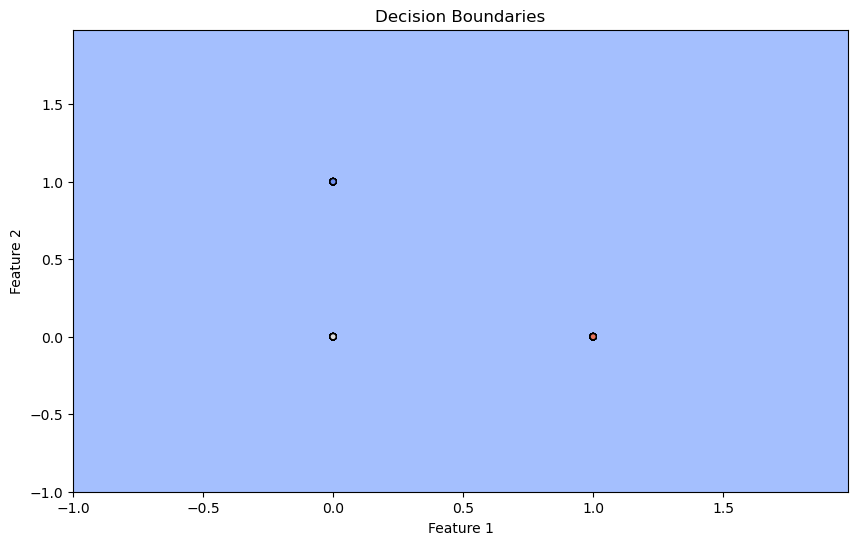

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a mesh grid
h = .02  # Step size in the mesh

# Define min and max for features based on training data
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the grid
grid_df = np.c_[xx.ravel(), yy.ravel()]

# Creating a DataFrame for compatibility if there are more features
if X_train.shape[1] > 2:
    additional_features = np.zeros((grid_df.shape[0], X_train.shape[1] - 2))
    grid_df = np.hstack((grid_df, additional_features))

# Best KNN from GridSearch
best_knn = grid_search.best_estimator_

# Predicting for every point in the mesh grid
Z = best_knn.predict(grid_df)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', s=20, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()


## Interview Questions